In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [2]:
!head adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [3]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [4]:
df = pd.read_csv('adult.data', sep=', ', names=cols)

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.shape

(32561, 15)

# Сколько мужчин и женщин?

In [7]:
df.sex.value_counts().reset_index()

,index,sex
0,Male,21790
1,Female,10771


# Средний возраст мужчин и женщин?

In [16]:
df.groupby('sex').age.mean().reset_index()

,sex,age
0,Female,36.858230
1,Male,39.433547


# Какая доля граждан США (United-States) в данном датасете?

In [9]:
df['native-country'].value_counts()['United-States'] / df['native-country'].count()

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

<BarContainer object of 16 artists>

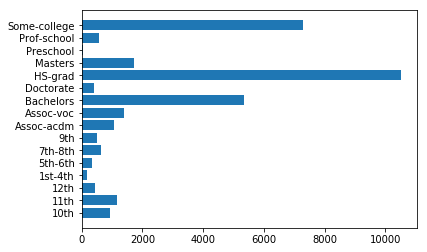

In [66]:
tmp_df = df.groupby('education').size().reset_index(name='counts')
x = tmp_df.education
y = tmp_df.counts
plt.barh(x, y)

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [75]:
tmp_fnlwgt = df.fnlwgt[df['marital-status'] == 'Divorced']
tmp_fnlwgt.describe()

count    4.443000e+03
mean     1.858028e+05
std      1.056468e+05
min      1.941000e+04
25%      1.155825e+05
50%      1.753700e+05
75%      2.310475e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

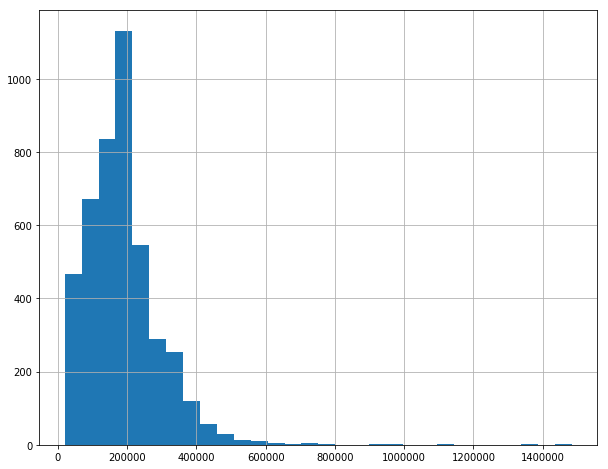

In [82]:
tmp_fnlwgt.hist(bins=30, figsize=(10, 8))

> Ответ: оно мне напоминает распределение Фишера

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [159]:
people_greater_50K = len(df[(df.result == '>50K') & ((df.education == 'Masters') | (df.education == 'Bachelors') | (df.education == 'Doctorate'))].index)
people = len(df[(df.education == 'Masters') | (df.education == 'Bachelors') | (df.education == 'Doctorate')].index)
print(people_greater_50K / people)

0.46535843011613937


D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


> Ответ: Нет, не правда.

# Сколько в среднем работают люди в неделю в зависимости от education?

In [177]:
df.groupby('education')['hours-per-week'].mean().reset_index()

,education,hours-per-week
0,10th,37.052519
1,11th,33.925957
2,12th,35.780600
3,1st-4th,38.255952
4,5th-6th,38.897898
5,7th-8th,39.366873
6,9th,38.044747
7,Assoc-acdm,40.504217
8,Assoc-voc,41.610709
9,Bachelors,42.614006


# Кто больше работает в неделю - мужчины или женщины?

In [180]:
df.groupby('sex')['hours-per-week'].mean().reset_index()

,sex,hours-per-week
0,Female,36.410361
1,Male,42.428086


> Ответ: мужчины

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [187]:
df.groupby('relationship')['hours-per-week'].mean().reset_index()

,relationship,hours-per-week
0,Husband,44.120139
1,Not-in-family,40.595665
2,Other-relative,37.006116
3,Own-child,33.269337
4,Unmarried,39.103018
5,Wife,36.861607


> Ответ: в отношениях

# Из каких стран люди работают farmers/fishers?

In [215]:
tmp_ser = df[df.occupation=='Farming-fishing']['native-country'].unique()
pd.Series(tmp_ser)

0     United-States
1          Cambodia
2            Poland
3         Guatemala
4            Mexico
5           England
6                 ?
7       Philippines
8             Italy
9       Puerto-Rico
10          Vietnam
11          Germany
12            Japan
13           Canada
14       Yugoslavia
15             Cuba
16         Portugal
17      El-Salvador
18             Hong
19          Ireland
20           France
dtype: object

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [226]:
max_hours_work = df['hours-per-week'].max()
max_hours_work

99

In [230]:
len(df[df['hours-per-week'] == max_hours_work].index)

85

In [260]:
df[df['hours-per-week'] == max_hours_work].result.value_counts()

<=50K    60
>50K     25
Name: result, dtype: int64